# Dropout and overfitting problems

# Importing and Downloading Requirements

In [ ]:
import numpy as np
np.random.seed(123)  # for reproducibility

!wget https://raw.githubusercontent.com/BKV15/SRU-deeplearning-workshop/master/dataset.py
!wget https://github.com/BKV15/SRU-deeplearning-workshop/blob/master/dataset/Data_hoda_full.mat?raw=true -P dataset

## Neural Net without Dropout



Test Accuracy: 0.8999999761581421 
Maximum Test Acuracy During Training:  0.9300000071525574


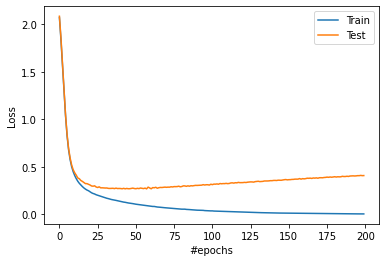

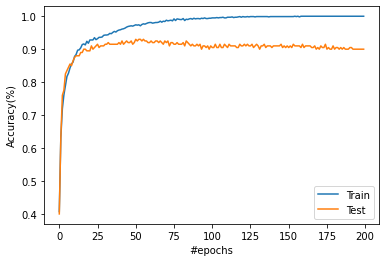

In [8]:
# 1. Import libraries and modules
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

# 2. Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

# 3. Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

# 5. Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

train_loss = []
train_acc = []
test_loss = []
test_acc = []

for i in range(200):
    # 7. Fit model on training data
    model.fit(x_train, y_train,
              epochs=1,
              batch_size=128, verbose=0)

    # 8. Evaluate model on test data
    loss, acc = model.evaluate(x_train, y_train, verbose=0)
    train_loss += [loss]
    train_acc += [acc]
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    test_loss += [loss]
    test_acc += [acc]
print("Test Accuracy:",test_acc[-1],"\nMaximum Test Acuracy During Training: ", max(test_acc))

plt.figure(1)
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(train_acc, label='Train')
plt.plot(test_acc, label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

## Neural Network with Dropout



Test Accuracy: 0.9350000023841858 
Maximum Test Acuracy During Training:  0.9549999833106995


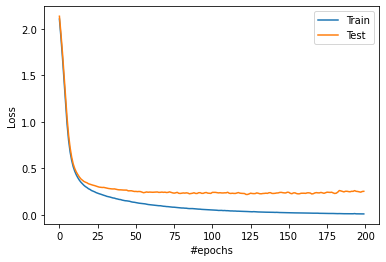

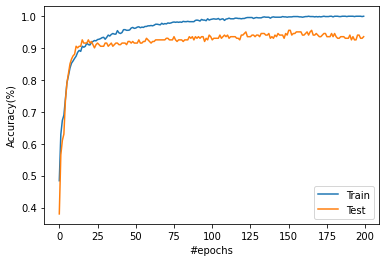

In [9]:
# 1. Import libraries and modules
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

# 2. Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

# 3. Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

# 5. Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

train_loss = []
train_acc = []
test_loss = []
test_acc = []

for i in range(200):
    # 7. Fit model on training data
    model.fit(x_train, y_train,
              epochs=1,
              batch_size=128, verbose=0)

    # 8. Evaluate model on test data
    loss, acc = model.evaluate(x_train, y_train, verbose=0)
    train_loss += [loss]
    train_acc += [acc]
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    test_loss += [loss]
    test_acc += [acc]
print("Test Accuracy:",test_acc[-1],"\nMaximum Test Acuracy During Training: ", max(test_acc))

plt.figure(1)
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(train_acc, label='Train')
plt.plot(test_acc, label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()